<a href="https://colab.research.google.com/github/TassyaRM/MachineLearning_TK-44-G4_/blob/main/UTS/UTS_ML_Classification_Students_Performance_in_Exams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NAMA : TASSYA RAMADHANTI
#NIM  : 1103204016
# Classification Model
# Disini saya menggunakan dataset [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data)


# Pengambilan Data dari API Kaggle
---


#**Create Token API kaggle:**
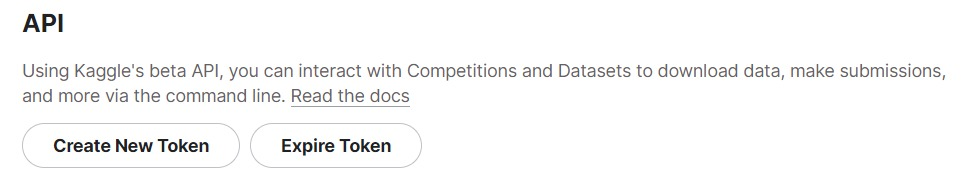
1. Login Kaggle.com
2. Kemudian pada menu Profile --> Account
3. Klik Create New Api Token
4. Maka akan terdownload file kaggle.json

In [64]:
#Install modul kaggle
!pip install kaggle

#Promp ChatGPT:
berikan kodingan untuk mengimpor file kaggle.json ke google collab

In [65]:
from google.colab import files

# Upload file kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tassyaramadhanti","key":"0100ff86eefed89e942ccf669125b605"}'}

#Promp ChatGPT:
berikan codingan membuat direktori kaggle kemudian pindahkan file kaggle.json yang sudah kita impor tadi kedalamnya

In [66]:
# Membuat direktori Kaggle
!mkdir -p ~/.kaggle

# Pindahkan file kaggle.json ke direktori Kaggle
!mv kaggle.json ~/.kaggle/

In [67]:
# Mencari dataset yang tersedia di kaggle
!kaggle datasets list -s "Students Performance in Exams"

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
spscientist/students-performance-in-exams                       Students Performance in Exams                        9KB  2018-11-09 18:25:25         251159       4006  0.7058824        
whenamancodes/students-performance-in-exams                     Students Performance in Exams                        9KB  2022-09-14 15:14:54          29804        479  1.0              
sonukumari47/students-performance-in-exams                      Students Performance in Exams                       10KB  2021-09-16 18:16:34           4298         71  0.9411765        
tanmoyie/grading-of-the-students-in-the-exam-ipe101-raw         G

In [68]:
# Download dan ekstrak dataset, dimana nantinya akan satu direktori dengan notebook ini
!kaggle datasets download spscientist/students-performance-in-exams --unzip

  0% 0.00/8.70k [00:00<?, ?B/s]
100% 8.70k/8.70k [00:00<00:00, 17.5MB/s]


Langkah-langkah diatas saya pelajari dari materi [Data Sains](https://drive.google.com/drive/folders/1uCSXhElJS7DheQ26rTev05mD5igK_eEf) pertemuan 5

#Library yang digunakan
---

In [32]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report

- pandas: Untuk manipulasi dan analisis data.
- matplotlib dan seaborn: Untuk visualisasi data.
- train_test_split: Untuk membagi data menjadi set pelatihan dan pengujian.
- XGBClassifier: Implementasi XGBoost untuk klasifikasi.
- mean_absolute_error, accuracy_score, classification_report: Metrik evaluasi model.

# EDA (Exploratory Data Analysis)
---
 Langkah untuk memahami karakteristik data, mencari pola, dan mengidentifikasi sebelum memodelkan data.

In [69]:
# memuat data
df = pd.read_csv("StudentsPerformance.csv")

# menampilkan 5 baris pertama dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [70]:
# Mengganti nama kolom
df = df.rename(columns={
    'race/ethnicity': 'Group',
    'parental level of education': 'parents_education_level',
    'test preparation course': 'test_preparation',
    'math score' : 'math_score',
    'reading score': 'reading_score',
    'writing score':'writing_score'
})


In [71]:
# melihat kembali 5 baris pertama dataset yang sudah di rename/ganti
df.head()

,gender,Group,parents_education_level,lunch,test_preparation,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


menampilkan 5 baris pertama dari masing-masing kolom pada dataset yang mana nama kolomnya sudah terbaru

In [72]:
#Menampilkan informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   1000 non-null   object
 1   Group                    1000 non-null   object
 2   parents_education_level  1000 non-null   object
 3   lunch                    1000 non-null   object
 4   test_preparation         1000 non-null   object
 5   math_score               1000 non-null   int64 
 6   reading_score            1000 non-null   int64 
 7   writing_score            1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


dapat dilihat ada dua tipe data yaitu object (gender, Group,parents_education_level, lunch, test_preparation) dan int64 (math_score, reading_score, writing_score), kemudian juga ada 1000 entri dengan total 8 kolom

In [73]:
# Menampilkan jumlah nilai yang hilang untuk setiap kolom
df.isnull().sum()

gender                     0
Group                      0
parents_education_level    0
lunch                      0
test_preparation           0
math_score                 0
reading_score              0
writing_score              0
dtype: int64

Tidak ada missing value atau nilai yang hilang

In [74]:
# Menampilkan statistik deskriptif dari dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Informasi statistik deskriptif
- math_score:
Jumlah entri: 1000, Rata-rata: 66.09, Standar deviasi: 15.16, Nilai minimum: 0, Kuartil 25%: 57.00, Median (Kuartil 50%): 66.00, Kuartil 75%: 77.00
Nilai maksimum: 100
- reading_score:
Jumlah entri: 1000, Rata-rata: 69.17, Standar deviasi: 14.60, Nilai minimum: 17, Kuartil 25%: 59.00, Median (Kuartil 50%): 70.00, Kuartil 75%: 79.00, Nilai maksimum: 100
- writing_score:
Jumlah entri: 1000, Rata-rata: 68.05, Standar deviasi: 15.20,Nilai minimum: 10, Kuartil 25%: 57.75, Median (Kuartil 50%): 69.00,Kuartil 75%: 79.00, Nilai maksimum: 100

# Data Visualization
----
Penggunaan grafik untuk memvisualisasikan distribusi dan hubungan antar variabel.


Dari materi [Data Sains](https://drive.google.com/drive/folders/1uCSXhElJS7DheQ26rTev05mD5igK_eEf)
pertemuan 5

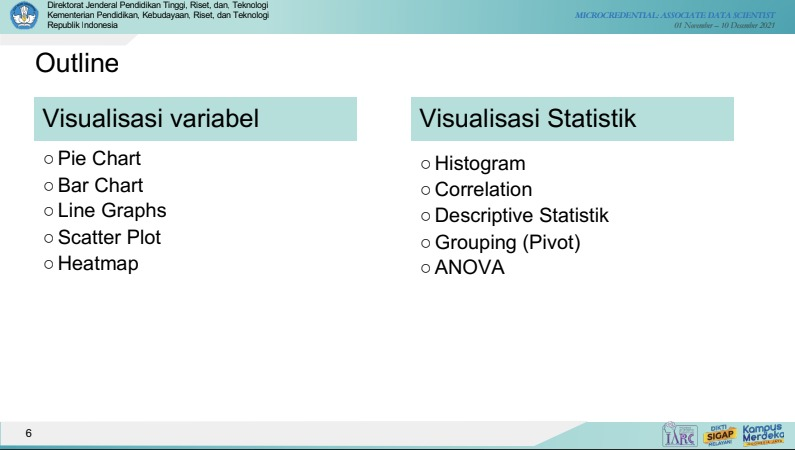

In [25]:
#Mengelompokkan numerical features
numerical_features = ["math_score","reading_score","writing_score"]

#Mengelompokkan categorical features
categorical_features = ["gender","Group","parents_education_level","lunch","test_preparation"]

Mengelompokkan kolom berdasarkan dua tipe data yang telah diketahui diatas, untuk numerik/int64 parameter variabelnya dinamakan numerical_features, sedangkan untuk object/kategori dinamakan categorical_features

#Promp ChatGPT:
berikan kodingan untuk membuat distribusi fitur numerik dari numerical_features = ["math_score","reading_score","writing_score"] dengan tata letak 1X3.

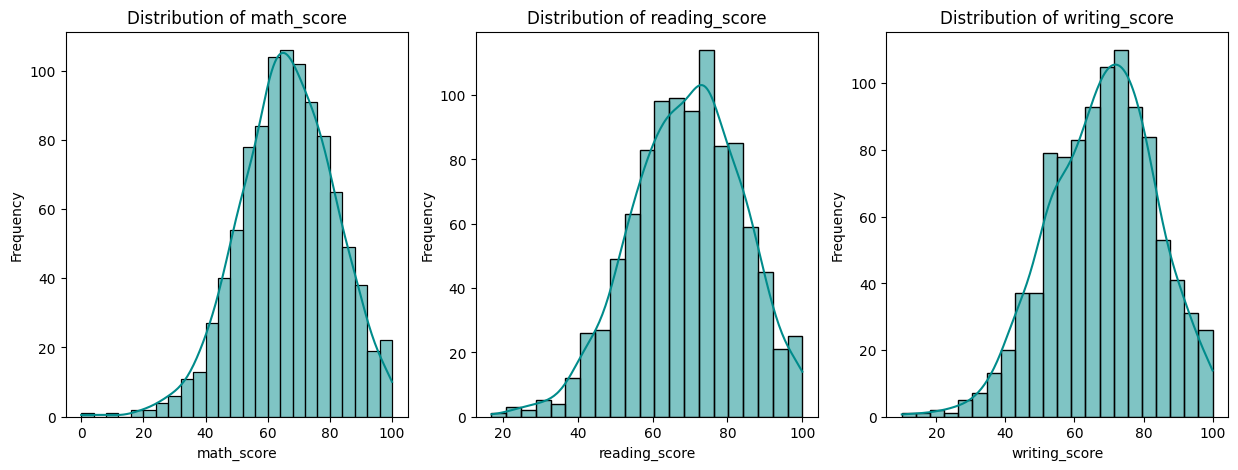

In [75]:
# Membuat distribusi untuk setiap fitur numerik dalam tata letak 1x3
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, color='darkcyan', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}', size=12)
    axes[i].set_xlabel(feature, size=10)
    axes[i].set_ylabel('Frequency', size=10)

 sns.histplot untuk membuat histogram dari setiap fitur numerik dalam tata letak 1x3. Jendela gambar dibuat dengan ukuran 15x5, dan setiap subplot menampilkan distribusi satu fitur numerik.

#Promp ChatGPT:
berikan kodingan untuk membuat distribusi fitur kategori dari categorical_features = ["gender","Group","parents_education_level","lunch","test_preparation"] dengan tata letak 2X3.

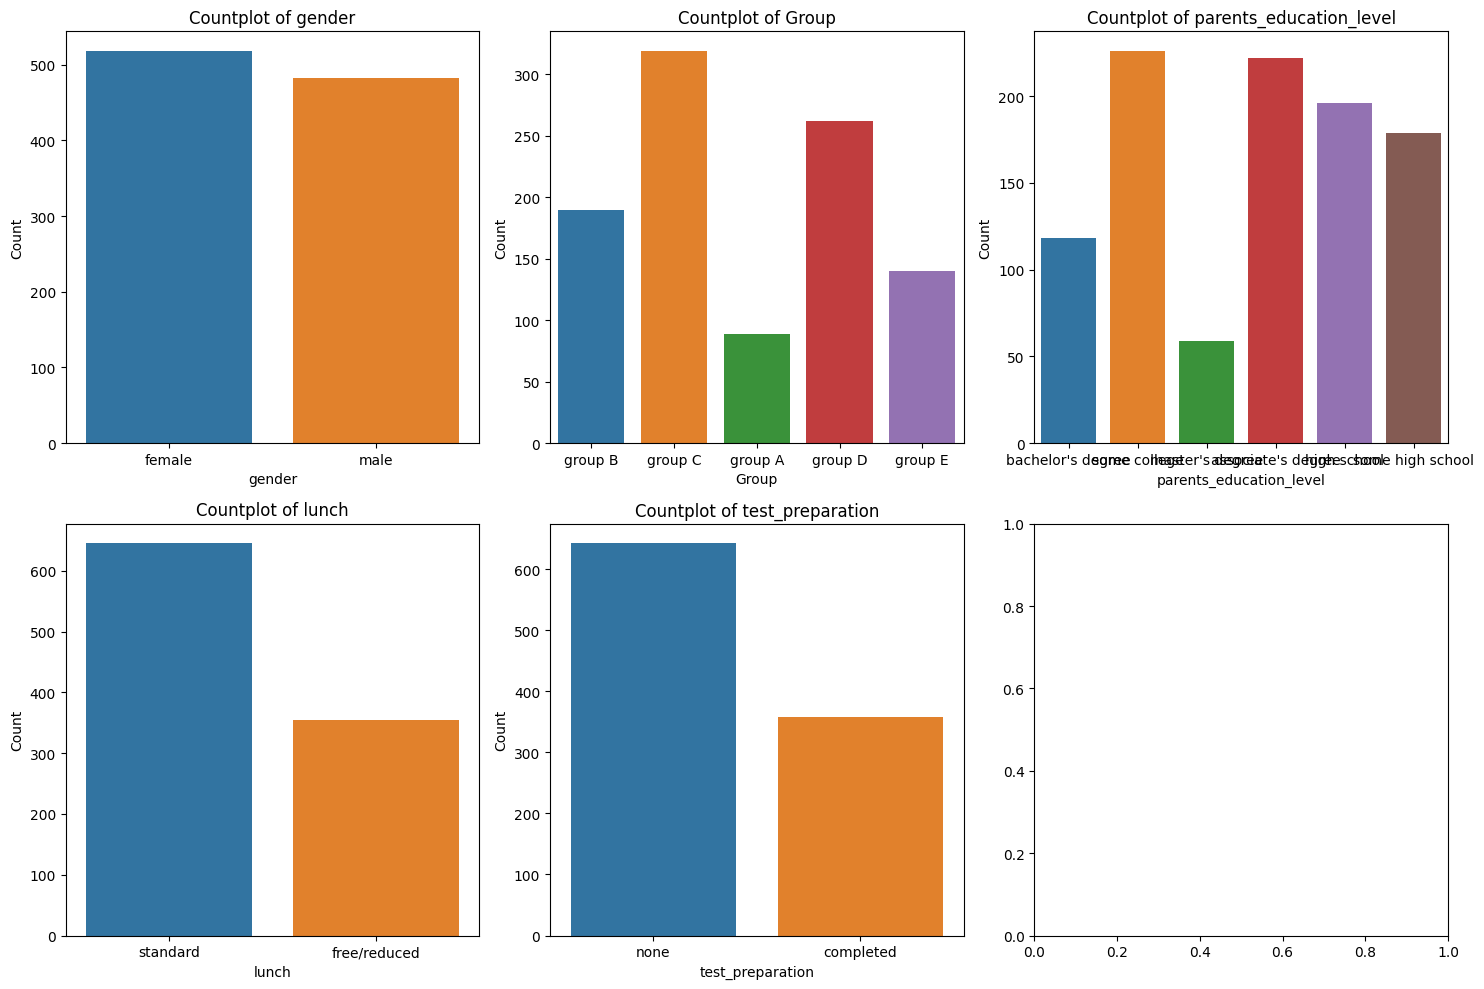

In [76]:
# Membuat countplot untuk setiap fitur kategorikal dalam tata letak 2x3
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Countplot of {feature}', size=12)
    axes[i//3, i%3].set_xlabel(feature, size=10)
    axes[i//3, i%3].set_ylabel('Count', size=10)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

sns.countplot untuk membuat countplot dari setiap fitur kategorikal dalam tata letak 2x3. Jendela gambar dibuat dengan ukuran 15x10, dan setiap subplot menampilkan countplot satu fitur kategorikal.

#Training dan Evaluating
---
Menggunakan XGBoost Classifier untuk mengklasifikasikan apakah siswa lulus (pass) atau tidak (fail) berdasarkan skor matematika.

In [77]:
# Encode categorical variables
data_encoded = pd.get_dummies(df, columns=["gender", "Group", "parents_education_level", "lunch", "test_preparation"], drop_first=True)

X = data_encoded.drop(['math_score'], axis=1)
y = data_encoded['math_score'] > 60  # Classification: Pass or Fail

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Encode Categorical Variables: Menggunakan one-hot encoding untuk mengubah variabel kategorikal menjadi bentuk numerik.
- Fungsi pd.get_dummies() digunakan untuk mengkodekan variabel kategori menjadi variabel dummy. Untuk setiap variabel kategori, ini membuat variabel dummy baru untuk setiap kategori unik. Misalnya, suatu gender variabel diubah menjadi dua variabel dummy: gender_male dan gender_female. Parameter tersebut drop_first=True memastikan bahwa salah satu variabel dummy dihilangkan untuk menghindari multikolinearitas.
- X adalah variabel independen dengan menghapus kolom 'math_score' dari data_encoded.
y variabel target. Dalam hal ini, apakah 'math_score' lebih besar dari 60, membuat klasifikasi apakah Lulus atau Gagal.

In [78]:
# Inisialisasi XGBoost classifier
model = XGBClassifier(
    n_estimators=500,   # Ubah sesuai kebutuhan
    max_depth=1,        # Ubah sesuai kebutuhan (lower max depth)
)

Jumlah estimator adalah jumlah pohon yang dibangun oleh model XGBoost. Semakin banyak estimator, semakin kompleks model dan semakin baik akurasi yang diharapkan. Namun, meningkatkan jumlah estimator juga dapat meningkatkan waktu pelatihan.

Kedalaman maksimum adalah kedalaman maksimum dari setiap pohon dalam model XGBoost. Semakin dalam pohon, semakin kompleks model dan semakin baik akurasi yang diharapkan. Namun, meningkatkan kedalaman maksimum juga dapat meningkatkan risiko overfitting.

In [79]:
# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [80]:
# Predict using the classification model
y_pred_classifier = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classifier)
print(f'Accuracy: {accuracy}')

# Display classification report
class_report = classification_report(y_test, y_pred_classifier)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.915
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.86      0.88        74
        True       0.92      0.94      0.93       126

    accuracy                           0.92       200
   macro avg       0.91      0.90      0.91       200
weighted avg       0.91      0.92      0.91       200



Memprediksi kelas (Pass/Fail) pada data uji dan menampilkan metrik evaluasi seperti akurasi dan classification report.
- Accuracy: 0.915
Akurasi (accuracy) mengukur sejauh mana model dapat mengklasifikasikan dengan benar. Dalam hal ini, akurasi sebesar 0.915 (atau 91.5%) menunjukkan bahwa sekitar 91.5% dari prediksi yang dibuat oleh model benar.

Classification Report:
- Precision: Precision mengukur sejauh mana prediksi positif yang dibuat oleh model benar. Precision yang tinggi menunjukkan bahwa ketika model mengklasifikasikan suatu kelas, itu biasanya benar. Dalam hal ini, precision untuk kelas "False" adalah 0.90, dan untuk kelas "True" adalah 0.92.

- Recall: Recall mengukur sejauh mana model dapat menemukan semua instans kelas yang benar. Recall yang tinggi menunjukkan bahwa model dapat mengenali sebagian besar instans kelas yang benar. Dalam hal ini, recall untuk kelas "False" adalah 0.86, dan untuk kelas "True" adalah 0.94.

- F1-Score: F1-score adalah rata-rata harmonis antara precision dan recall. F1-score yang tinggi menunjukkan keseimbangan yang baik antara precision dan recall. Dalam hal ini, F1-score untuk kelas "False" adalah 0.88, dan untuk kelas "True" adalah 0.93.

- Support: Support adalah jumlah aktual dari setiap kelas dalam dataset. Dalam hal ini, terdapat 74 sampel untuk kelas "False" dan 126 sampel untuk kelas "True".

- Macro Average dan Weighted Average:
Macro Avg: Mengambil rata-rata dari metrik evaluasi untuk setiap kelas tanpa memperhitungkan distribusi kelas. Macro avg dari precision, recall, dan F1-score adalah sekitar 0.91.

- Weighted Avg: Mengambil rata-rata dari metrik evaluasi untuk setiap kelas dengan memperhitungkan distribusi kelas. Weighted avg dari precision, recall, dan F1-score adalah sekitar 0.91.

Kesimpulan:
Hasil ini menunjukkan bahwa model memiliki performa yang baik dalam mengklasifikasikan data. Tingginya nilai precision, recall, dan F1-score untuk kedua kelas menunjukkan kemampuan model untuk melakukan klasifikasi dengan baik.

In [81]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_classifier)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.085


MAE 0.085 menunjukkan bahwa rata-rata perbedaan absolut antara prediksi dan nilai sebenarnya adalah sekitar 8.5%. Dengan kata lain, model ini memiliki ketepatan yang relatif tinggi dalam memprediksi target.

# Data Baru
---
Proses ini memungkinkan untuk mengevaluasi seberapa baik performa model untuk memprediksi secara akurat pada data baru ini.

In [82]:
# New Data for Prediction
new_data = pd.DataFrame({
    'gender': ['female'],
    'Group': ['group C'],
    'parents_education_level': ["master's degree"],
    'lunch': ['standard'],
    'test_preparation': ['completed'],
    'math_score': [85],
    'reading_score': [90],
    'writing_score': [88]
})


# Encode categorical variables for new data
new_data_encoded = pd.get_dummies(new_data, columns=["gender", "Group", "parents_education_level", "lunch", "test_preparation"], drop_first=True)

# Pastikan data baru memiliki kolom yang sama dengan data latih
missing_cols = set(X_train.columns) - set(new_data_encoded.columns)
for col in missing_cols:
    new_data_encoded[col] = 0

# Susun ulang kolom agar sesuai dengan data pelatihan
new_data_encoded = new_data_encoded[X_train.columns]

# Make predictions on new data
new_data_pred = model.predict(new_data_encoded)

# Display predictions
print("Prediction for new data:", new_data_pred[0])

Prediction for new data: 1


Prediksinya adalah 0 atau 1. Jika hasil prediksi menunjukkan kinerja akademik siswa berada di bawah rata-rata maka (0) atau jika di atas rata-rata (1).